In [1]:
#! /usr/bin/python3
import random
import time
import datetime
import pandas as pd
from enum import Enum
import seaborn as sns
import matplotlib.pyplot as plt


# Get CPU, memory and network usage one minute samples from a live system
podscpu = pd.read_csv('cpu.csv', parse_dates=True).set_index('Time')
podsmem = pd.read_csv('mem.csv', parse_dates=True).set_index('Time')
podsnet = pd.read_csv('network.csv', parse_dates=True).set_index('Time')

# get a dataframe of all netin data to all pods
podsnetin = podsnet.loc[:, podsnet.columns.str.startswith('-> ')]
podsnetin.columns = podsnetin.columns.str.replace("-> ", "", regex=True)

# get a dataframe of all netout data from all pods
podsnetout = podsnet.loc[:, podsnet.columns.str.startswith('<- ')]
podsnetout.columns = podsnetout.columns.str.replace("<- ", "", regex=True)

# this df has all negative values because it represents data going out. Convert to abs values
podsnetout = podsnetout.abs()   

In [2]:
# Extract start and end times in the df 
start, end = podscpu.iloc[[0, -1]].index

print('This dataset contains information from {} to {}'.format(start, end))
print('Do you want to narrow down the window of observation (Y/[N]): ')
pref = input()
pref = pref.upper()
if pref == 'Y':
    # Note:  We do not have semantic or syntactic validation yet.
    print('Enter start time in this format [{}]: '.format(start))
    start = input()
    print('Enter end time in this format [{}]: '.format(end))
    end = input()
else:
    pass

# Start: 2022-07-24 05:20:00 
# End: 2022-07-24 06:00:00

print('Scoping all data from {} to {}'.format(start, end))

This dataset contains information from 2022-07-23 14:43:00 to 2022-07-24 14:43:00
Do you want to narrow down the window of observation (Y/[N]): 

Scoping all data from 2022-07-23 14:43:00 to 2022-07-24 14:43:00


In [3]:
print('Scoping all data from {} to {}'.format(start, end))
podscpu = podscpu.loc[start:end]
podsmem = podsmem.loc[start:end]
podsnetin = podsnetin.loc[start:end]
podsnetout = podsnetout.loc[start:end]

Scoping all data from 2022-07-23 14:43:00 to 2022-07-24 14:43:00


In [4]:
podsmem

,alarms-0,alarms-1,alarms-2,astackserver-555bb9f766-f42r7,calico-kube-controllers-545578d5-7dltd,calico-node-6k78j,calico-node-djbmx,calico-node-jcsnq,calico-node-p5dkp,calico-node-xlcnc,...,robot-ui-1,robot-ui-2,robot-zookeeper-0,robot-zookeeper-1,robot-zookeeper-2,tyk-0,tyk-1,tyk-2,workerdns-bgl2k,workerdns-t4qd9
Time,,,,,,,,,,,,,,,,,,,,,
2022-07-23 14:43:00,68022272,120762368,130813952,190332928,38436864,124915712,124407808,128241664,125849600,129728512,...,96346112,96743424,522170368,519802880,522698752,138584064,221675520,217956352,19144704,15085568
2022-07-23 14:44:00,69234688,120193024,130965504,192491520,38436864,125251584,124723200,128106496,127397888,129748992,...,96346112,96768000,522231808,519864320,522784768,138506240,221769728,218017792,19144704,15085568
2022-07-23 14:45:00,69742592,121638912,131555328,190509056,38436864,125423616,124616704,128221184,126046208,129929216,...,96387072,96874496,522096640,519786496,522924032,138661888,221892608,217878528,19144704,15085568
2022-07-23 14:46:00,66363392,118652928,130375680,189632512,38436864,125042688,124624896,128483328,126132224,130031616,...,96428032,96899072,522108928,519725056,522625024,138375168,222048256,218198016,19144704,15085568
2022-07-23 14:47:00,68034560,119975936,130400256,189640704,38436864,125075456,124575744,128274432,126365696,142581760,...,96280576,97026048,522182656,519741440,522661888,138342400,222097408,218243072,19144704,15085568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-24 14:39:00,68710400,119111680,127627264,192012288,39284736,125599744,124547072,128204800,125870080,129146880,...,96931840,96022528,521736192,519393280,522928128,138665984,221917184,220499968,21106688,15101952
2022-07-24 14:40:00,67186688,122138624,129409024,192028672,39284736,126054400,124645376,128528384,125206528,129449984,...,96825344,97636352,521814016,519344128,523026432,138809344,221290496,220188672,21106688,15101952
2022-07-24 14:41:00,68096000,122699776,126021632,193146880,39284736,125972480,124923904,128651264,125034496,129576960,...,98353152,97660928,522125312,519376896,523030528,138690560,221233152,220114944,21106688,15101952


In [5]:
podsnetout

,alarms-0,alarms-1,alarms-2,astackserver-555bb9f766-f42r7,calico-kube-controllers-545578d5-7dltd,calico-node-6k78j,calico-node-djbmx,calico-node-jcsnq,calico-node-p5dkp,calico-node-xlcnc,...,robot-ui-1,robot-ui-2,robot-zookeeper-0,robot-zookeeper-1,robot-zookeeper-2,tyk-0,tyk-1,tyk-2,workerdns-bgl2k,workerdns-t4qd9
Time,,,,,,,,,,,,,,,,,,,,,
2022-07-23 14:44:00,39540.0,34550.0,39053.0,26054.0,88.0,5536570.0,9587792.0,7959125.0,13432450.0,7624287.0,...,0.0,0.0,83.0,169.0,248.0,2106.0,2083.0,2078.0,445.0,372.0
2022-07-23 14:45:00,6913.0,18864.0,19132.0,30401.0,72.0,5524809.0,6505421.0,9576624.0,15661474.0,8404422.0,...,3.3,3.4,187.0,77.0,373.0,2087.0,2109.0,2088.0,431.0,437.0
2022-07-23 14:46:00,50641.0,46690.0,36757.0,44226.0,88.0,3577615.0,8747980.0,8904651.0,14706267.0,12764313.0,...,1.2,1.8,194.0,94.0,369.0,2094.0,2111.0,2123.0,309.0,499.0
2022-07-23 14:47:00,53483.0,48732.0,50181.0,29047.0,87.0,7795660.0,12639103.0,8829132.0,17035628.0,7404882.0,...,3.3,3.7,133.0,179.0,381.0,2101.0,709.0,1362.0,395.0,488.0
2022-07-23 14:48:00,42143.0,35601.0,37167.0,23097.0,66.0,8756082.0,5348379.0,9559676.0,7082686.0,12808728.0,...,4.2,4.3,182.0,174.0,383.0,2076.0,2099.0,2106.0,185.0,287.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-24 14:39:00,46704.0,39204.0,22245.0,31721.0,58.0,7475060.0,10230339.0,6407092.0,20595670.0,3929572.0,...,2.2,4.1,185.0,197.0,380.0,1638.0,2072.0,2082.0,302.0,105.0
2022-07-24 14:40:00,40950.0,23574.0,40087.0,26695.0,69.0,6288431.0,4969418.0,13088169.0,8216028.0,2963967.0,...,4.7,6.9,188.0,141.0,390.0,2102.0,2085.0,1259.0,527.0,461.0
2022-07-24 14:41:00,43779.0,39156.0,41155.0,40061.0,91.0,8399187.0,11697362.0,5439944.0,12443723.0,8540913.0,...,3.4,0.0,196.0,174.0,148.0,1292.0,2110.0,2122.0,514.0,109.0


In [6]:
# correlate pod's CPU usage with pod's network input

cin = podscpu.corrwith(podsnetin, axis=0)
cin.sort_values(ascending = False).where(cin>0.7).count()

22

In [7]:
# correlate pod's Memory usage with pod's network input

cin = podsmem.corrwith(podsnetin, axis=0)
cin.sort_values(ascending = False).where(cin>0.7).count()

6

In [8]:
# correlate pod's CPU usage with pod's network output

cout = podscpu.corrwith(podsnetout, axis=0)
cout.sort_values(ascending = False).where(cout>0.7).count()

18

In [9]:
# correlate pod's Mem usage with pod's network output

cout = podsmem.corrwith(podsnetout, axis=0)
cout.sort_values(ascending = False).where(cout>0.7).count()

6

In [10]:
netcorr = podsnetout.corrwith(podsnetin, axis=0)
netcorr.sort_values(ascending = False).where(netcorr>0.9997)

cat-restconf-0                            0.999949
cat-inventory-1                           0.999936
cat-restconf-1                            0.999930
cat-inventory-0                           0.999878
optima-pce-dispatcher-7648458f9c-cl7x6    0.999821
                                            ...   
robot-postgres-1                               NaN
robot-postgres-2                               NaN
robot-topo-svc-2                               NaN
prometheus-core-59665476c8-bgtfd               NaN
docker-registry-66c8dbcb7f-crxrn               NaN
Length: 157, dtype: float64

In [11]:
cpu_mean = podscpu.describe().loc['mean'].rename('cpu_usage_mean')

In [12]:
cpu_mean

alarms-0                                  0.042718
alarms-1                                  0.040091
alarms-2                                  0.028373
astackserver-555bb9f766-f42r7             0.060128
calico-kube-controllers-545578d5-7dltd    0.000817
                                            ...   
tyk-0                                     0.032647
tyk-1                                     0.032814
tyk-2                                     0.024774
workerdns-bgl2k                           0.001990
workerdns-t4qd9                           0.002014
Name: cpu_usage_mean, Length: 157, dtype: float64

In [13]:
mem_mean = podsmem.describe().loc['mean'].rename('mem_usage_mean')

In [14]:
mem_mean

alarms-0                                  6.862537e+07
alarms-1                                  1.244705e+08
alarms-2                                  1.325403e+08
astackserver-555bb9f766-f42r7             1.899061e+08
calico-kube-controllers-545578d5-7dltd    3.882911e+07
                                              ...     
tyk-0                                     1.387311e+08
tyk-1                                     2.218763e+08
tyk-2                                     2.167346e+08
workerdns-bgl2k                           2.064951e+07
workerdns-t4qd9                           1.510703e+07
Name: mem_usage_mean, Length: 157, dtype: float64

In [15]:
combo = pd.concat([cpu_mean, mem_mean], axis=1)

In [16]:
combo

,cpu_usage_mean,mem_usage_mean
alarms-0,0.042718,6.862537e+07
alarms-1,0.040091,1.244705e+08
alarms-2,0.028373,1.325403e+08
astackserver-555bb9f766-f42r7,0.060128,1.899061e+08
calico-kube-controllers-545578d5-7dltd,0.000817,3.882911e+07
...,...,...
tyk-0,0.032647,1.387311e+08
tyk-1,0.032814,2.218763e+08
tyk-2,0.024774,2.167346e+08
workerdns-bgl2k,0.001990,2.064951e+07


In [17]:
combo.index.rename('pod', inplace=True)

In [18]:
combo

,cpu_usage_mean,mem_usage_mean
pod,,
alarms-0,0.042718,6.862537e+07
alarms-1,0.040091,1.244705e+08
alarms-2,0.028373,1.325403e+08
astackserver-555bb9f766-f42r7,0.060128,1.899061e+08
calico-kube-controllers-545578d5-7dltd,0.000817,3.882911e+07
...,...,...
tyk-0,0.032647,1.387311e+08
tyk-1,0.032814,2.218763e+08
tyk-2,0.024774,2.167346e+08


In [19]:
# Screen scraping for now. API calls would be better. 
# kubectl describe nodes | grep "\%" | grep -v cpu | grep -v memory | grep -v hugepage | grep -v epheme > usage.txt
# output will look something like this:
# default alarms-2 50m (0%)      0 (0%)      1048Mi (1%)      4Gi (4%)       2d2h


fd = open('usage.txt', 'r')
podslist = []
for line in fd:
    podsdict = {}
    words = line.split()
    podsdict['namespace'] = words[0]
    podsdict['pod'] = words[1]
    if 'm' in words[2]:
        cpu_req = words[2].replace('m', '')
        cpu_req = int(cpu_req) / 1000
    else:
        cpu_req = int(words[2])
        # Add a one millicpu for all those with 0 cpu requests
        # to avoid div-by-zero later on.
        if cpu_req == 0.0:
            cpu_req = 0.001
 # Ignore words[3]
    podsdict['cpu_req'] = cpu_req
    if 'm' in words[4]:
        cpu_lim = words[4].replace('m', '')
        cpu_lim = int(cpu_lim) / 1000
    else:
        cpu_lim = int(words[4])
    # Ignore words[5]
    podsdict['cpu_lim'] = cpu_lim
    if 'Mi' in words[6]:
        mem_req = words[6].replace('Mi', '')
        mem_req = int(mem_req) * 1024 * 1024
    elif 'Gi' in words[6]:
        mem_req = words[6].replace('Gi', '')
        mem_req = int(mem_req) * 1024 * 1024 * 1024
    # Ignore words[7]
    podsdict['mem_req'] = mem_req
    if 'Mi' in words[8]:
        mem_lim = words[8].replace('Mi', '')
        mem_lim = int(mem_lim) * 1024 * 1024
    elif 'Gi' in words[8]:
        mem_lim = words[8].replace('Gi', '')
        mem_lim = int(mem_lim) * 1024 * 1024 * 1024
    podsdict['mem_lim'] = mem_lim
    # Ignore words[9]
    #print(podsdict)
    podslist.append(podsdict)
    
df1 = pd.DataFrame(podslist)
df1 = df1.set_index('pod')

In [20]:
df1

,namespace,cpu_req,cpu_lim,mem_req,mem_lim
pod,,,,,
alarms-1,default,0.050,0.0,1098907648,4294967296
cas-0,default,0.050,4.0,1098907648,6442450944
cat-fp-deployment-manager-58f4bcf67d-sckzj,default,0.200,1.0,268435456,1342177280
cat-inventory-0,default,0.500,0.0,4294967296,4294967296
cat-restconf-1,default,0.500,0.0,4294967296,4294967296
...,...,...,...,...,...
calico-node-jcsnq,kube-system,0.250,0.0,1098907648,4294967296
kube-proxy-slrdv,kube-system,0.001,0.0,1098907648,4294967296
workerdns-t4qd9,kube-system,0.100,0.0,73400320,178257920


In [21]:
df2 = df1.merge(combo, left_on='pod', right_on='pod')

In [22]:
df2

,namespace,cpu_req,cpu_lim,mem_req,mem_lim,cpu_usage_mean,mem_usage_mean
pod,,,,,,,
alarms-1,default,0.050,0.0,1098907648,4294967296,0.040091,1.244705e+08
cas-0,default,0.050,4.0,1098907648,6442450944,0.018210,1.408212e+09
cat-fp-deployment-manager-58f4bcf67d-sckzj,default,0.200,1.0,268435456,1342177280,0.010651,2.535380e+08
cat-inventory-0,default,0.500,0.0,4294967296,4294967296,0.021748,3.679264e+09
cat-restconf-1,default,0.500,0.0,4294967296,4294967296,0.021143,2.188514e+09
...,...,...,...,...,...,...,...
calico-node-jcsnq,kube-system,0.250,0.0,1098907648,4294967296,0.028580,1.284623e+08
kube-proxy-slrdv,kube-system,0.001,0.0,1098907648,4294967296,0.000348,3.232139e+07
workerdns-t4qd9,kube-system,0.100,0.0,73400320,178257920,0.002014,1.510703e+07


In [23]:
def calc_overbudget(usage, req):
    if req == 0:
        # some pods don't have any cpu request.
        return 100
    else:
        # calculate over-budgeting.
        return (int((req - usage) * 100/ req))

df2['mem_deviation'] = df2.apply(lambda x: calc_overbudget(x['mem_usage_mean'], x['mem_req']), axis=1)
df2['cpu_deviation'] = df2.apply(lambda x: calc_overbudget(x['cpu_usage_mean'], x['cpu_req']), axis=1)

In [24]:
df2

,namespace,cpu_req,cpu_lim,mem_req,mem_lim,cpu_usage_mean,mem_usage_mean,mem_deviation,cpu_deviation
pod,,,,,,,,,
alarms-1,default,0.050,0.0,1098907648,4294967296,0.040091,1.244705e+08,88,19
cas-0,default,0.050,4.0,1098907648,6442450944,0.018210,1.408212e+09,-28,63
cat-fp-deployment-manager-58f4bcf67d-sckzj,default,0.200,1.0,268435456,1342177280,0.010651,2.535380e+08,5,94
cat-inventory-0,default,0.500,0.0,4294967296,4294967296,0.021748,3.679264e+09,14,95
cat-restconf-1,default,0.500,0.0,4294967296,4294967296,0.021143,2.188514e+09,49,95
...,...,...,...,...,...,...,...,...,...
calico-node-jcsnq,kube-system,0.250,0.0,1098907648,4294967296,0.028580,1.284623e+08,88,88
kube-proxy-slrdv,kube-system,0.001,0.0,1098907648,4294967296,0.000348,3.232139e+07,97,65
workerdns-t4qd9,kube-system,0.100,0.0,73400320,178257920,0.002014,1.510703e+07,79,97


In [25]:
# Get count of those pods whose usage is less than their minimum request. 
# This means they are over-reserving (overbudget) resources. 
df2['mem_deviation_cut_n'] = pd.cut(df2['mem_deviation'], [-10000, -110, -100, -80, -50, -25, 0, 50, 80, 100, 110, 200])
df2['cpu_deviation_cut_n'] = pd.cut(df2['cpu_deviation'], [-10000, -110, -100, -80, -50, -25, 0, 50, 80, 100, 110, 200])
# get sums within group 
grouped_mem = df2.groupby(df2['mem_deviation_cut_n'], as_index=False).count() # set x and y
grouped_cpu = df2.groupby(df2['cpu_deviation_cut_n'], as_index=False).count() # set x and y

<BarContainer object of 11 artists>

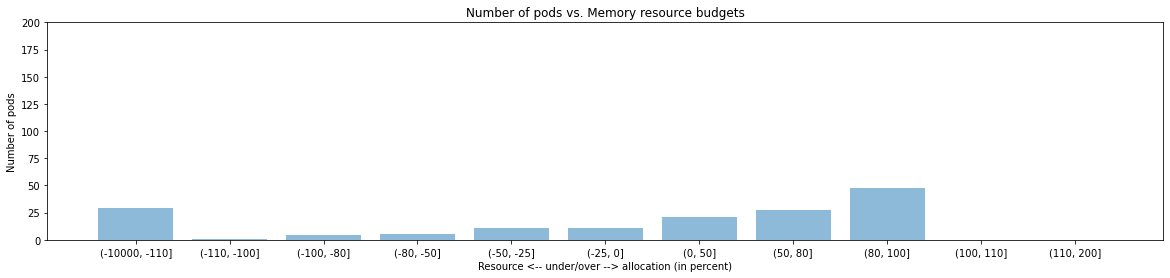

In [26]:
# set x and y
x = grouped_mem['mem_deviation_cut_n'].astype(str)
y = grouped_mem['mem_deviation'] # create visual
fig, ax = plt.subplots(figsize=(20,4))
plt.xlabel('Resource <-- under/over --> allocation (in percent)')
plt.ylabel('Number of pods')
plt.title('Number of pods vs. Memory resource budgets')
plt.ylim(0,200)
plt.bar(x, y, alpha=.5, )


<BarContainer object of 11 artists>

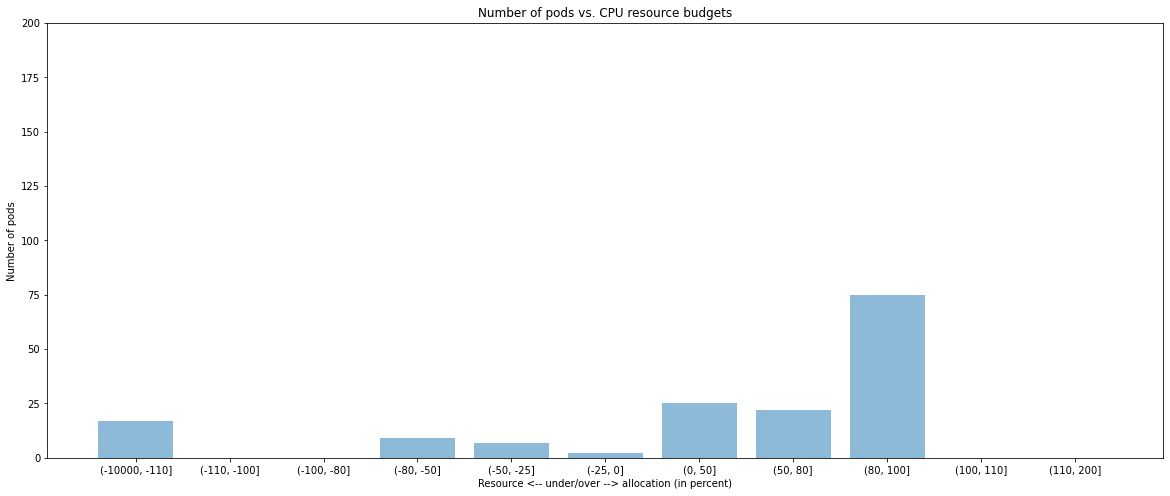

In [27]:
# set x and y
x = grouped_cpu['cpu_deviation_cut_n'].astype(str)
y = grouped_cpu['cpu_deviation'] # create visual
fig, ax = plt.subplots(figsize=(20,8))
plt.xlabel('Resource <-- under/over --> allocation (in percent)')
plt.ylabel('Number of pods')
plt.title('Number of pods vs. CPU resource budgets')
plt.ylim(0,200)
plt.bar(x, y, alpha=.5, )

In [28]:
file_path = 'ciscoproj.xlsx'
writer = pd.ExcelWriter(file_path, engine='openpyxl', mode='w')
df2.to_excel(writer)
writer.save()